In [100]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import warnings

# Suppress all warnings
warnings.filterwarnings("ignore")

### **EX2**

In [101]:
data2 = pd.read_csv('Auto.txt',sep=r'\s{2,}',header = None)
data2.columns = ["mpg(miles par galon)","cylinders","displace","horsepower","accel","year","weight","origin","make","model","price"]

**sep=r'\s{2,}'** : This uses a regular expression to match two or more spaces as the separator between values. Adjust if needed for the actual delimiter in your file.

In [102]:
data2.head(10)

,mpg(miles par galon),cylinders,displace,horsepower,accel,year,weight,origin,make,model,price
0,43.1,4,90,48.0,21.5,78,1985,2,Volkswagen,Rabbit Dl,2400.0
1,36.1,4,98,66.0,14.4,78,1800,1,Ford,Fiesta,1900.0
2,32.8,4,78,52.0,19.4,78,1985,3,Mazda,GLC Deluxe,2200.0
3,39.4,4,85,70.0,18.6,78,2070,3,Datsun,B210 GX,2725.0
4,36.1,4,91,60.0,16.4,78,1800,3,Honda,Civic CVCC,2250.0
5,19.9,8,260,110.0,15.5,78,3365,1,Oldsmobile,Cutlass,3300.0
6,19.4,8,318,140.0,13.2,78,3735,1,Dodge,Diplomat,3125.0
7,20.2,8,302,139.0,12.8,78,3570,1,Mercury,Monarch,2850.0
8,19.2,6,231,105.0,19.2,78,3535,1,Pontiac,Phoenix,2800.0
9,20.5,6,200,95.0,18.2,78,3155,1,Chevrolet,Malibu,3275.0


In [103]:
 data2.isnull().sum()

mpg(miles par galon)     0
cylinders                0
displace                 0
horsepower               0
accel                    0
year                     0
weight                   0
origin                   0
make                     0
model                    1
price                   16
dtype: int64

In [104]:
# Fill missing values in 'model' column with the mode (most frequent value)
data2['model'] = data2['model'].fillna(data2['model'].mode()[0])

# Fill missing values in 'price' column with the mean
data2['price'] = data2['price'].fillna(data2['price'].mean())

# Verify if there are any remaining missing values
print(data2.isnull().sum())

mpg(miles par galon)    0
cylinders               0
displace                0
horsepower              0
accel                   0
year                    0
weight                  0
origin                  0
make                    0
model                   0
price                   0
dtype: int64


In [105]:
data_numeric_col = []
for i in data2.columns:
    print(type(data2[i][0]))
    if type(data2[i][0]) != str:    #au lieu de 'str'
        data_numeric_col.append(i)
print(data_numeric_col)   

<class 'numpy.float64'>
<class 'numpy.int64'>
<class 'numpy.int64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.int64'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'numpy.float64'>
['mpg(miles par galon)', 'cylinders', 'displace', 'horsepower', 'accel', 'year', 'price']


**enlever la partie year**

In [106]:
# data_numeric_col = data_numeric_col.remove('year') 
data_numeric_col.remove('year') 
data_numeric_col

['mpg(miles par galon)',
 'cylinders',
 'displace',
 'horsepower',
 'accel',
 'price']

Explained Variance Ratio: [0.38055693 0.21776909]
   Principal Component 1  Principal Component 2
0              -2.356828              -0.481498
1              -1.465529              -0.318843
2              -1.679554               0.001268
3              -1.690028              -0.558435
4              -1.630572              -0.259435
PCA Components:
 [[-0.53223131 -0.02835219  0.61139402  0.57276394 -0.07414149  0.09256269]
 [-0.40074925  0.76742997  0.04903678 -0.33185058  0.36872201 -0.04433895]]


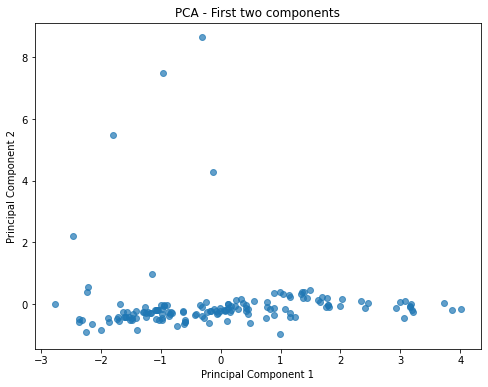

In [107]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

data_numeric = data2[data_numeric_col]

# Step 1: Standardize the data
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_numeric)

# Step 2: Apply PCA
pca = PCA(n_components=2)  # You can choose the number of components based on your need
principal_components = pca.fit_transform(data_scaled)

# Step 3: Create a DataFrame with the PCA components
pca_df = pd.DataFrame(data=principal_components, columns=['Principal Component 1', 'Principal Component 2'])

# Print the explained variance ratio (how much variance each component explains)
print("Explained Variance Ratio:", pca.explained_variance_ratio_)

# Print the first few rows of the principal components
print(pca_df.head())

# If you want to see the components themselves:
print("PCA Components:\n", pca.components_)

plt.figure(figsize=(8, 6))
plt.scatter(pca_df['Principal Component 1'], pca_df['Principal Component 2'], alpha=0.7)
plt.title('PCA - First two components')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()


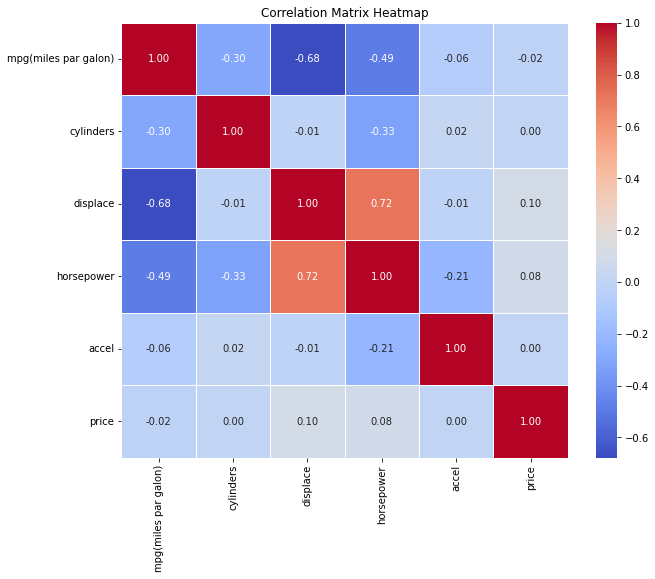

In [108]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming your DataFrame is named df
correlation_matrix = data_numeric.corr()

# Create a heatmap of the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix Heatmap')
plt.show()

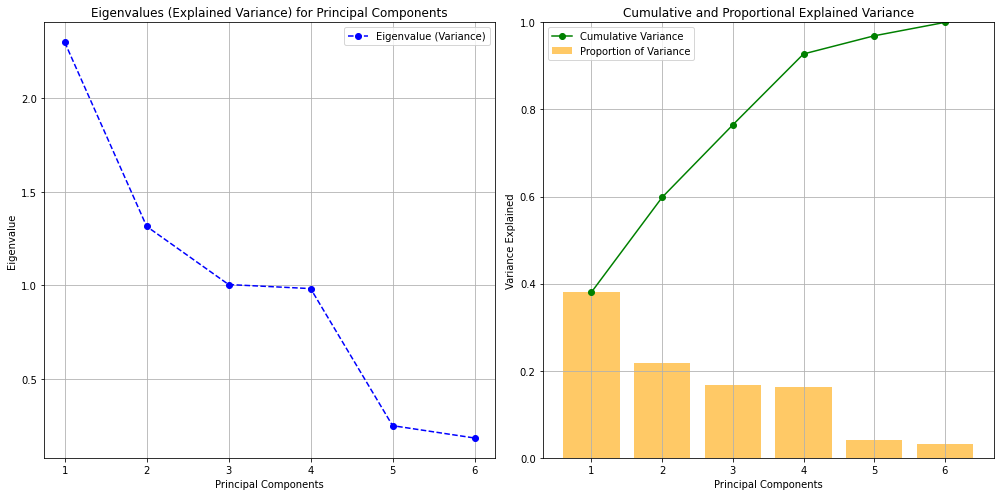

In [112]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Assuming 'data2' is your DataFrame and 'data_numeric_col' contains the numeric columns

# Step 1: Standardize the data
data_numeric = data2[data_numeric_col]
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_numeric)

# Step 2: Apply PCA
pca = PCA(n_components=6)  # Let's calculate the first 7 components
pca.fit(data_scaled)

# Eigenvalues (explained variance) for each principal component
eigenvalues = pca.explained_variance_

# Proportion of variance explained by each component
explained_variance_ratio = pca.explained_variance_ratio_

# Cumulative proportion of explained variance
cumulative_explained_variance = np.cumsum(explained_variance_ratio)

# Create a figure for both plots
plt.figure(figsize=(14, 7))

# 1. Scree Plot: Eigenvalue for each principal component
plt.subplot(1, 2, 1)  # 1 row, 2 columns, 1st plot
plt.plot(range(1, 7), eigenvalues, marker='o', linestyle='--', color='b', label='Eigenvalue (Variance)')
plt.title('Eigenvalues (Explained Variance) for Principal Components')
plt.xlabel('Principal Components')
plt.ylabel('Eigenvalue')
plt.xticks(range(1, 7))
plt.grid(True)
plt.legend()

# 2. Cumulative Explained Variance Plot
plt.subplot(1, 2, 2)  # 1 row, 2 columns, 2nd plot
plt.plot(range(1, 7), cumulative_explained_variance, marker='o', linestyle='-', color='g', label='Cumulative Variance')
plt.bar(range(1, 7), explained_variance_ratio, alpha=0.6, color='orange', label='Proportion of Variance')
plt.title('Cumulative and Proportional Explained Variance')
plt.xlabel('Principal Components')
plt.ylabel('Variance Explained')
plt.xticks(range(1,7))
plt.ylim(0, 1)
plt.grid(True)
plt.legend()

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plots
plt.show()


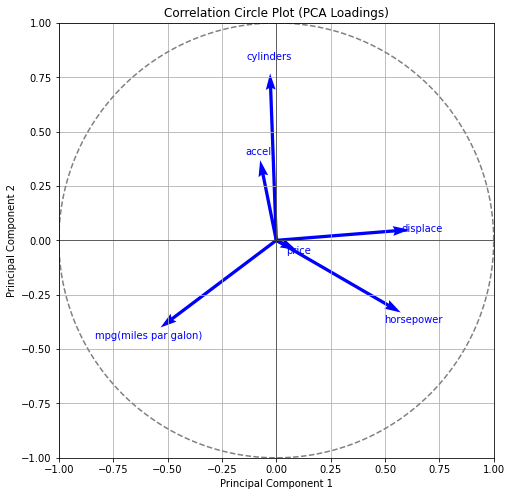

In [113]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Assuming 'data2' is your DataFrame and 'data_numeric_col' contains the numeric columns
data_numeric = data2[data_numeric_col]

# Standardize the data
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_numeric)

# Apply PCA
pca = PCA(n_components=2)  # We only care about the first two components for the correlation circle
pca.fit(data_scaled)

# Get the loadings (components of the PCA)
loadings = pca.components_.T  # Transpose to get features on columns

# Create the correlation circle plot
plt.figure(figsize=(8, 8))

# Plot the circle
theta = np.linspace(0, 2 * np.pi, 1000)
plt.plot(np.cos(theta), np.sin(theta), label="Unit Circle", color="gray", linestyle="--")

# Plot the PCA loadings as vectors (arrows)
plt.quiver(np.zeros(len(data_numeric_col)), np.zeros(len(data_numeric_col)),
           loadings[:, 0], loadings[:, 1], angles='xy', scale_units='xy', scale=1, color='blue')

# Add labels for the features
for i, feature in enumerate(data_numeric_col):
    plt.text(loadings[i, 0] * 1.1, loadings[i, 1] * 1.1, feature, color='blue', ha='center', va='center')

# Plot settings
plt.xlim(-1, 1)
plt.ylim(-1, 1)
plt.axhline(0, color='black', linewidth=0.5)
plt.axvline(0, color='black', linewidth=0.5)
plt.title('Correlation Circle Plot (PCA Loadings)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid(True)

# Ensure equal aspect ratio
plt.gca().set_aspect('equal', adjustable='box')

# Display the plot
plt.show()


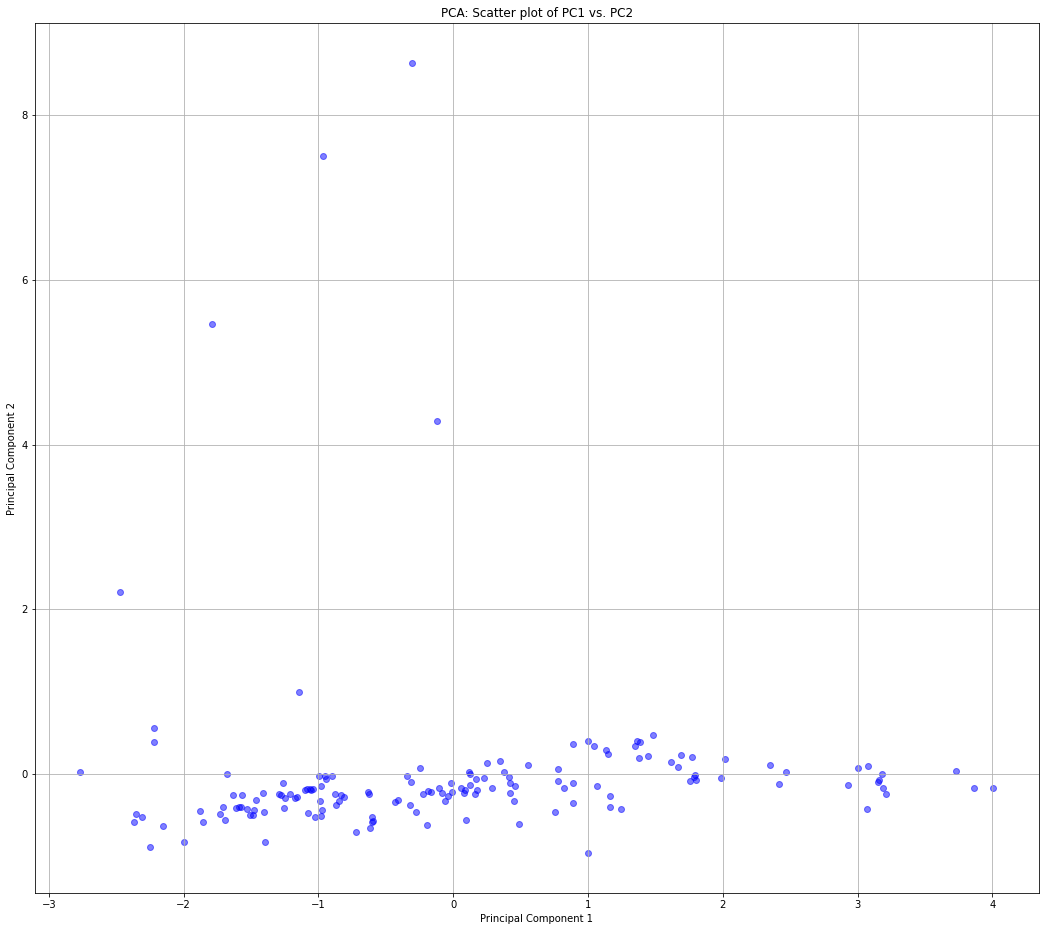

In [114]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Assuming 'data2' is your DataFrame and 'data_numeric_col' contains the numeric columns

# Step 1: Standardize the data
data_numeric = data2[data_numeric_col]
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_numeric)

# Step 2: Apply PCA
pca = PCA(n_components=2)  # We only care about the first 2 components for the scatter plot
pca.fit(data_scaled)

# Step 3: Transform the data to get the projections onto the principal components
data_pca = pca.transform(data_scaled)

# Step 4: Create the scatter plot for PC1 vs. PC2
plt.figure(figsize=(18, 16))
plt.scatter(data_pca[:, 0], data_pca[:, 1], color='b', alpha=0.5)
plt.title('PCA: Scatter plot of PC1 vs. PC2')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid(True)
plt.show()

# Optionally, add labels to the points if you have labels (for example, row indices or category labels)
# For example, if you have row indices in `data2`:
# for i, label in enumerate(data2.index):
#     plt.text(data_pca[i, 0], data_pca[i, 1], str(label), color='red', fontsize=8)


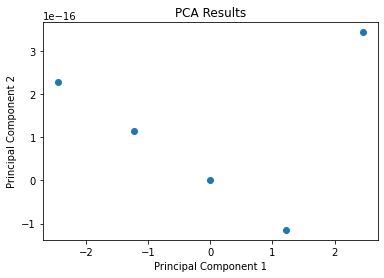

Explained variance ratio: [1.00000000e+00 1.31476818e-32]


In [52]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import pandas as pd
import matplotlib.pyplot as plt

# Sample data: 3 features (features could represent any data like height, weight, etc.)
data = pd.DataFrame({
    'feature1': [1, 2, 3, 4, 5],
    'feature2': [2, 3, 4, 5, 6],
    'feature3': [3, 4, 5, 6, 7]
})

# Step 1: Standardize the data
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

# Step 2: Apply PCA
pca = PCA(n_components=2)
principal_components = pca.fit_transform(data_scaled)

# Step 3: Create a DataFrame with the PCA components
pca_df = pd.DataFrame(principal_components, columns=['PC1', 'PC2'])

# Step 4: Visualize the results
plt.scatter(pca_df['PC1'], pca_df['PC2'])
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA Results')
plt.show()

# Explained Variance
print('Explained variance ratio:', pca.explained_variance_ratio_)


### **EX3**

In [156]:
# http://mistis.inrialpes.fr/software/SMEL/donnees.html
# https://mistis.inrialpes.fr/software/SMEL/donnees/cardiaques.txt
data3 = pd.read_csv('cardiaques.txt',delim_whitespace=True,skiprows =47,header = None)

In [164]:
data3.columns = ["ID","Age1950","Examining M.D.(1950)","pression systholique1950","pression diastholique1950","taille1950",
                 "poids1950","cholestérol1950","Socio-economic status","Clinical status",
                 "Examining MD (1962)","pression systholique1962","pression diastholique1962","cholestérol1962","poids1962",
                 "Ischemic hd diagnosis","Year of death","Death"]

In [165]:
data3.shape

(199, 18)

In [166]:
data3.head(10)

,ID,Age1950,Examining M.D.(1950),pression systholique1950,pression diastholique1950,taille1950,poids1950,cholestérol1950,Socio-economic status,Clinical status,Examining MD (1962),pression systholique1962,pression diastholique1962,cholestérol1962,poids1962,Ischemic hd diagnosis,Year of death,Death
0,1,42,1,110,65,64,147,291,2,8,4,120,78,271,146,2,68,1
1,2,53,1,130,72,69,167,278,1,6,2,122,68,250,165,9,67,1
2,3,53,2,120,90,70,222,342,4,8,1,132,90,304,223,2,64,1
3,4,48,4,120,80,72,229,239,4,8,2,118,68,209,227,3,66,1
4,5,53,3,118,74,66,134,243,3,8,5,118,56,261,138,2,66,1
5,6,58,2,122,72,69,135,210,3,8,4,130,72,245,136,2,64,1
6,7,48,4,130,90,67,165,219,3,8,4,138,86,275,166,2,63,1
7,8,60,1,124,80,74,235,203,3,8,1,160,90,271,226,3,65,1
8,9,59,4,160,100,72,206,269,5,8,3,150,100,291,198,3,67,1
9,10,40,3,120,80,69,148,185,3,8,3,110,64,241,152,2,66,1


In [167]:
data3.isnull().sum()

ID                           0
Age1950                      0
Examining M.D.(1950)         0
pression systholique1950     0
pression diastholique1950    0
taille1950                   0
poids1950                    0
cholestérol1950              0
Socio-economic status        0
Clinical status              0
Examining MD (1962)          0
pression systholique1962     0
pression diastholique1962    0
cholestérol1962              0
poids1962                    0
Ischemic hd diagnosis        0
Year of death                0
Death                        0
dtype: int64

In [168]:
data3.isna().sum()

ID                           0
Age1950                      0
Examining M.D.(1950)         0
pression systholique1950     0
pression diastholique1950    0
taille1950                   0
poids1950                    0
cholestérol1950              0
Socio-economic status        0
Clinical status              0
Examining MD (1962)          0
pression systholique1962     0
pression diastholique1962    0
cholestérol1962              0
poids1962                    0
Ischemic hd diagnosis        0
Year of death                0
Death                        0
dtype: int64

In [172]:
data_numeric_col = []
for i in data3.columns:
    print(type(data3[i][0]))
    if type(data3[i][0]) != str:    #au lieu de 'str'
        data_numeric_col.append(i)
print(data_numeric_col)   
print(len((data_numeric_col)))

<class 'numpy.int64'>
<class 'numpy.int64'>
<class 'numpy.int64'>
<class 'numpy.int64'>
<class 'numpy.int64'>
<class 'numpy.int64'>
<class 'numpy.int64'>
<class 'numpy.int64'>
<class 'numpy.int64'>
<class 'numpy.int64'>
<class 'numpy.int64'>
<class 'numpy.int64'>
<class 'numpy.int64'>
<class 'numpy.int64'>
<class 'numpy.int64'>
<class 'numpy.int64'>
<class 'numpy.int64'>
<class 'numpy.int64'>
['ID', 'Age1950', 'Examining M.D.(1950)', 'pression systholique1950', 'pression diastholique1950', 'taille1950', 'poids1950', 'cholestérol1950', 'Socio-economic status', 'Clinical status', 'Examining MD (1962)', 'pression systholique1962', 'pression diastholique1962', 'cholestérol1962', 'poids1962', 'Ischemic hd diagnosis', 'Year of death', 'Death']
18


In [174]:
# Original list of all columns
data3.columns = ['ID', 'Age1950', 'Examining M.D.(1950)', 'pression systholique1950', 
               'pression diastholique1950', 'taille1950', 'poids1950', 'cholestérol1950', 
               'Socio-economic status', 'Clinical status', 'Examining MD (1962)', 
               'pression systholique1962', 'pression diastholique1962', 'cholestérol1962', 
               'poids1962', 'Ischemic hd diagnosis', 'Year of death', 'Death']

# List of columns you want to keep
columns_to_keep = ['Age1950', 'pression systholique1950', 'pression diastholique1950', 
                   'taille1950', 'poids1950', 'cholestérol1950', 'pression systholique1962', 
                   'pression diastholique1962', 'cholestérol1962', 'poids1962']

# Filter the columns to keep only the ones in 'columns_to_keep'
data_numeric_col = [col for col in data3.columns if col in columns_to_keep]

# Display the filtered list
print(data_numeric_col)

['Age1950', 'pression systholique1950', 'pression diastholique1950', 'taille1950', 'poids1950', 'cholestérol1950', 'pression systholique1962', 'pression diastholique1962', 'cholestérol1962', 'poids1962']


Explained Variance Ratio: [0.27387629 0.22145357]
   Principal Component 1  Principal Component 2
0              -2.499799               0.592355
1              -1.207778              -0.148477
2               1.516265              -2.197850
3               0.381891              -3.098300
4              -2.703976               1.184286
PCA Components:
 [[ 0.11647189  0.42870516  0.47051918  0.12336914  0.32236093 -0.01609434
   0.43545117  0.42531471 -0.03947909  0.2996555 ]
 [ 0.31508981  0.3244901   0.17838696 -0.47773987 -0.45566686  0.02425258
   0.21463829  0.01740828 -0.07288974 -0.52484404]]


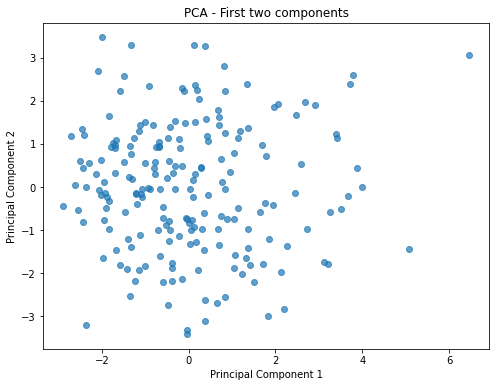

In [175]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

data_numeric = data3[data_numeric_col]

# Step 1: Standardize the data
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_numeric)

# Step 2: Apply PCA
pca = PCA(n_components=2)  # You can choose the number of components based on your need
principal_components = pca.fit_transform(data_scaled)

# Step 3: Create a DataFrame with the PCA components
pca_df = pd.DataFrame(data=principal_components, columns=['Principal Component 1', 'Principal Component 2'])

# Print the explained variance ratio (how much variance each component explains)
print("Explained Variance Ratio:", pca.explained_variance_ratio_)

# Print the first few rows of the principal components
print(pca_df.head())

# If you want to see the components themselves:
print("PCA Components:\n", pca.components_)

plt.figure(figsize=(8, 6))
plt.scatter(pca_df['Principal Component 1'], pca_df['Principal Component 2'], alpha=0.7)
plt.title('PCA - First two components')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()


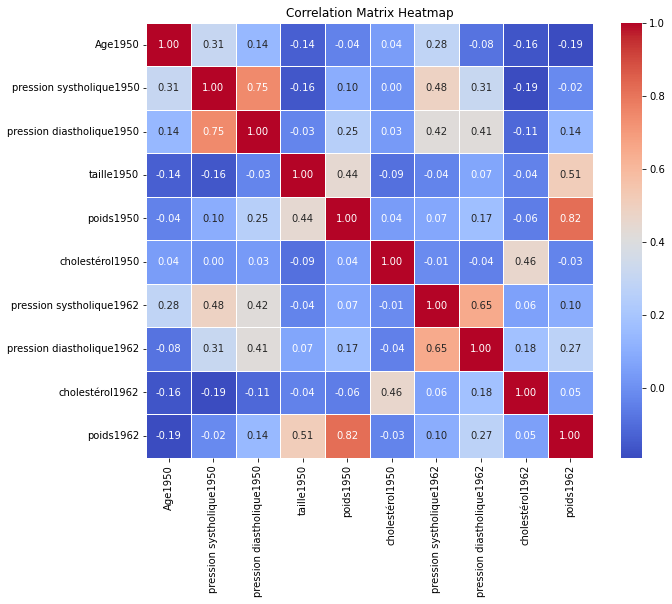

In [176]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming your DataFrame is named df
correlation_matrix = data_numeric.corr()

# Create a heatmap of the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix Heatmap')
plt.show()

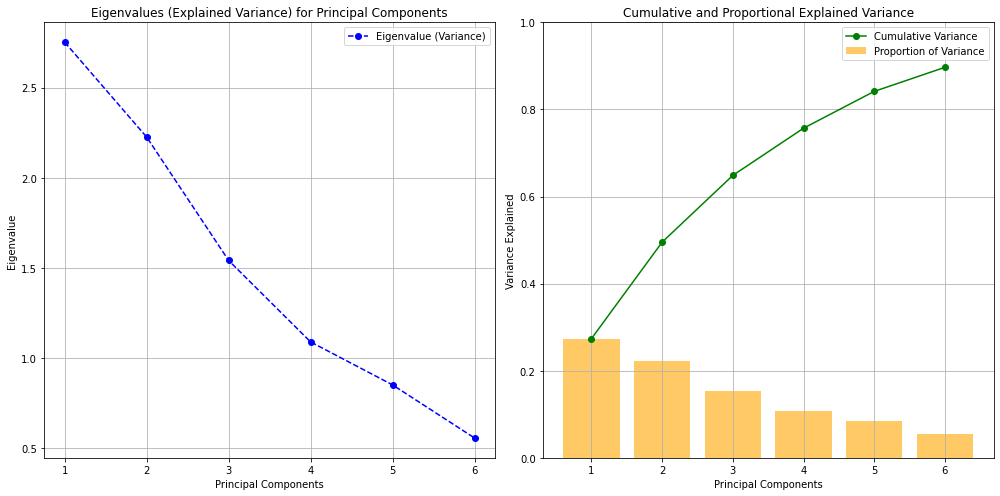

In [178]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Assuming 'data2' is your DataFrame and 'data_numeric_col' contains the numeric columns

# Step 1: Standardize the data
data_numeric = data3[data_numeric_col]
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_numeric)

# Step 2: Apply PCA
pca = PCA(n_components=6)  # Let's calculate the first 7 components
pca.fit(data_scaled)

# Eigenvalues (explained variance) for each principal component
eigenvalues = pca.explained_variance_

# Proportion of variance explained by each component
explained_variance_ratio = pca.explained_variance_ratio_

# Cumulative proportion of explained variance
cumulative_explained_variance = np.cumsum(explained_variance_ratio)

# Create a figure for both plots
plt.figure(figsize=(14, 7))

# 1. Scree Plot: Eigenvalue for each principal component
plt.subplot(1, 2, 1)  # 1 row, 2 columns, 1st plot
plt.plot(range(1, 7), eigenvalues, marker='o', linestyle='--', color='b', label='Eigenvalue (Variance)')
plt.title('Eigenvalues (Explained Variance) for Principal Components')
plt.xlabel('Principal Components')
plt.ylabel('Eigenvalue')
plt.xticks(range(1, 7))
plt.grid(True)
plt.legend()

# 2. Cumulative Explained Variance Plot
plt.subplot(1, 2, 2)  # 1 row, 2 columns, 2nd plot
plt.plot(range(1, 7), cumulative_explained_variance, marker='o', linestyle='-', color='g', label='Cumulative Variance')
plt.bar(range(1, 7), explained_variance_ratio, alpha=0.6, color='orange', label='Proportion of Variance')
plt.title('Cumulative and Proportional Explained Variance')
plt.xlabel('Principal Components')
plt.ylabel('Variance Explained')
plt.xticks(range(1,7))
plt.ylim(0, 1)
plt.grid(True)
plt.legend()

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plots
plt.show()


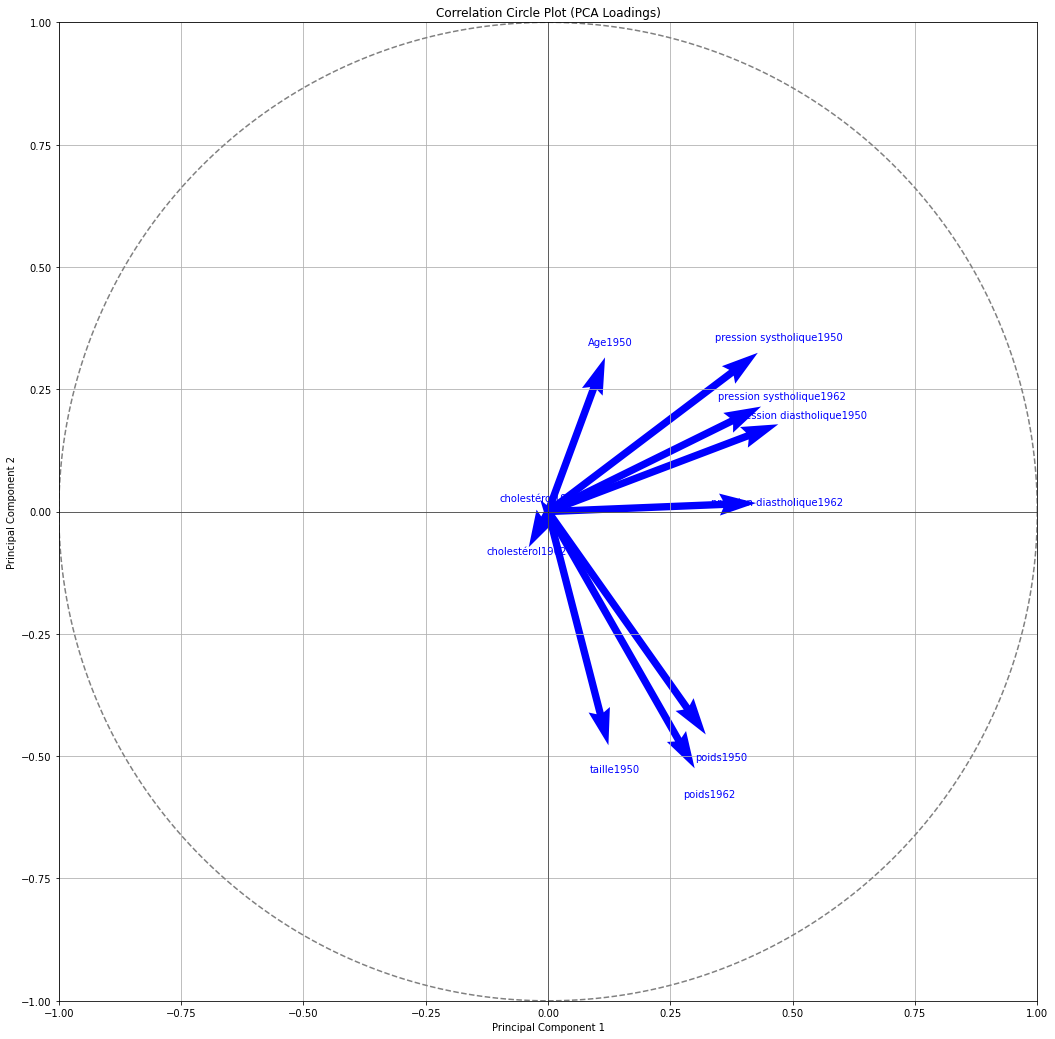

In [180]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Assuming 'data2' is your DataFrame and 'data_numeric_col' contains the numeric columns
data_numeric = data3[data_numeric_col]

# Standardize the data
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_numeric)

# Apply PCA
pca = PCA(n_components=2)  # We only care about the first two components for the correlation circle
pca.fit(data_scaled)

# Get the loadings (components of the PCA)
loadings = pca.components_.T  # Transpose to get features on columns

# Create the correlation circle plot
plt.figure(figsize=(18,18))

# Plot the circle
theta = np.linspace(0, 2 * np.pi, 1000)
plt.plot(np.cos(theta), np.sin(theta), label="Unit Circle", color="gray", linestyle="--")

# Plot the PCA loadings as vectors (arrows)
plt.quiver(np.zeros(len(data_numeric_col)), np.zeros(len(data_numeric_col)),
           loadings[:, 0], loadings[:, 1], angles='xy', scale_units='xy', scale=1, color='blue')

# Add labels for the features
for i, feature in enumerate(data_numeric_col):
    plt.text(loadings[i, 0] * 1.1, loadings[i, 1] * 1.1, feature, color='blue', ha='center', va='center')

# Plot settings
plt.xlim(-1, 1)
plt.ylim(-1, 1)
plt.axhline(0, color='black', linewidth=0.5)
plt.axvline(0, color='black', linewidth=0.5)
plt.title('Correlation Circle Plot (PCA Loadings)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid(True)

# Ensure equal aspect ratio
plt.gca().set_aspect('equal', adjustable='box')

# Display the plot
plt.show()


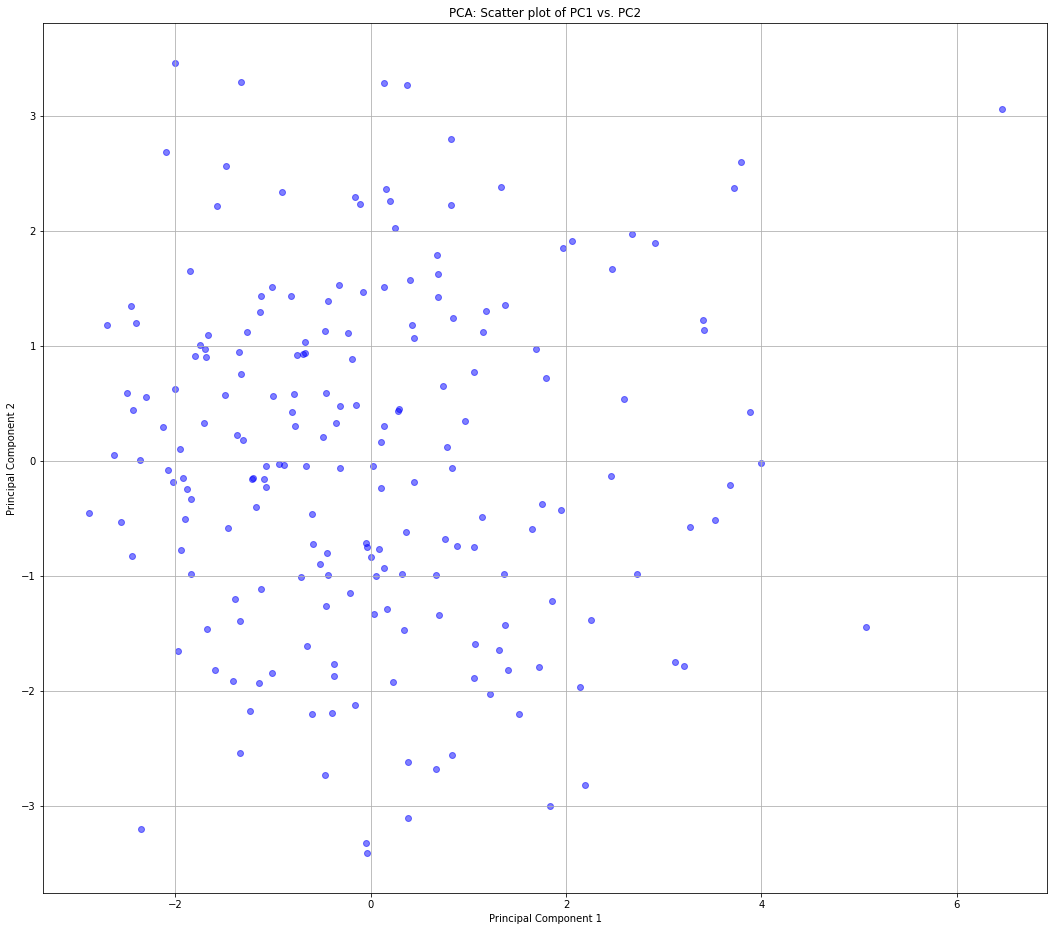

In [181]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Assuming 'data2' is your DataFrame and 'data_numeric_col' contains the numeric columns

# Step 1: Standardize the data
data_numeric = data3[data_numeric_col]
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_numeric)

# Step 2: Apply PCA
pca = PCA(n_components=2)  # We only care about the first 2 components for the scatter plot
pca.fit(data_scaled)

# Step 3: Transform the data to get the projections onto the principal components
data_pca = pca.transform(data_scaled)

# Step 4: Create the scatter plot for PC1 vs. PC2
plt.figure(figsize=(18, 16))
plt.scatter(data_pca[:, 0], data_pca[:, 1], color='b', alpha=0.5)
plt.title('PCA: Scatter plot of PC1 vs. PC2')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid(True)
plt.show()

# Optionally, add labels to the points if you have labels (for example, row indices or category labels)
# For example, if you have row indices in `data2`:
# for i, label in enumerate(data2.index):
#     plt.text(data_pca[i, 0], data_pca[i, 1], str(label), color='red', fontsize=8)


### **EX4**

In [186]:
column_names = ['NUM', 'DEPART', 'REGION', 'TXCR','URBR','JEUN','AGE','CHOM','AGRI','ARTI','CADR','EMPL','OUVR','PROF','FISC','FE90']  # Example column names

data4 = pd.read_csv('depart1.txt', header=None, names=column_names,delim_whitespace=True)

print(data4.head())

   NUM DEPART REGION   TXCR   URBR   JEUN    AGE   CHOM   AGRI   ARTI   CADR  \
0    1     Ai    RhA  12.19  0.339  0.285  0.133  0.070  0.045  0.084  0.088   
1    2     As    Pic   0.89  0.358  0.289  0.143  0.133  0.049  0.070  0.071   
2    3     Al    Auv  -2.63  0.464  0.227  0.204  0.135  0.086  0.095  0.070   
3    4     AP    PAC  10.00  0.190  0.235  0.190  0.123  0.065  0.127  0.090   
4    5     AH    PAC   7.82  0.294  0.250  0.173  0.089  0.072  0.117  0.078   

    EMPL   OUVR   PROF    FISC  FE90  
0  0.240  0.347  0.195  2772.3  52.3  
1  0.240  0.400  0.171  2854.4  56.9  
2  0.262  0.311  0.176  3159.6  42.7  
3  0.261  0.256  0.200  4033.1  52.3  
4  0.302  0.230  0.201  3364.9  53.5  


In [187]:
data4

,NUM,DEPART,REGION,TXCR,URBR,JEUN,AGE,CHOM,AGRI,ARTI,CADR,EMPL,OUVR,PROF,FISC,FE90
0,1,Ai,RhA,12.19,0.339,0.285,0.133,0.070,0.045,0.084,0.088,0.240,0.347,0.195,2772.3,52.3
1,2,As,Pic,0.89,0.358,0.289,0.143,0.133,0.049,0.070,0.071,0.240,0.400,0.171,2854.4,56.9
2,3,Al,Auv,-2.63,0.464,0.227,0.204,0.135,0.086,0.095,0.070,0.262,0.311,0.176,3159.6,42.7
3,4,AP,PAC,10.00,0.190,0.235,0.190,0.123,0.065,0.127,0.090,0.261,0.256,0.200,4033.1,52.3
4,5,AH,PAC,7.82,0.294,0.250,0.173,0.089,0.072,0.117,0.078,0.302,0.230,0.201,3364.9,53.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
90,91,Es,IdF,9.82,0.871,0.286,0.090,0.072,0.004,0.054,0.171,0.301,0.220,0.250,3470.4,54.9
91,92,HS,IdF,0.31,1.001,0.236,0.130,0.082,0.000,0.059,0.249,0.282,0.177,0.232,4533.1,58.0
92,93,SS,IdF,4.12,1.000,0.285,0.097,0.119,0.000,0.057,0.097,0.333,0.300,0.212,4122.3,64.4
93,94,VM,IdF,1.88,1.000,0.253,0.118,0.091,0.001,0.060,0.167,0.314,0.225,0.234,3942.1,56.7


In [188]:
data4.isnull().sum()

NUM       0
DEPART    0
REGION    0
TXCR      0
URBR      0
JEUN      0
AGE       0
CHOM      0
AGRI      0
ARTI      0
CADR      0
EMPL      0
OUVR      0
PROF      0
FISC      0
FE90      0
dtype: int64

In [189]:
data4.isna().sum()

NUM       0
DEPART    0
REGION    0
TXCR      0
URBR      0
JEUN      0
AGE       0
CHOM      0
AGRI      0
ARTI      0
CADR      0
EMPL      0
OUVR      0
PROF      0
FISC      0
FE90      0
dtype: int64

### **EX5**

In [192]:
data5 = pd.read_csv('Temperature.txt', header=None,delim_whitespace=True)

print(data5.head())

     0    1    2     3     4     5     6     7     8     9     10    11   12
0  ajac  7.7  8.7  10.5  12.6  15.9  19.8  22.0  22.2  20.3  16.3  11.8  8.7
1  ange  4.2  4.9   7.9  10.4  13.6  17.0  18.7  18.4  16.1  11.7   7.6  4.9
2  ango  4.6  5.4   8.9  11.3  14.5  17.2  19.5  19.4  16.9  12.5   8.1  5.3
3  besa  1.1  2.2   6.4   9.7  13.6  16.9  18.7  18.3  15.5  10.4   5.7  2.0
4  biar  7.6  8.0  10.8  12.0  14.7  17.8  19.7  19.9  18.5  14.8  10.9  8.2


### **EX6**

In [ ]:
# http://lib.stat.cmu.edu/datasets
# https://lib.stat.cmu.edu/datasets/wind.data

In [193]:
data6 = pd.read_csv('wind.data.txt', header=None,delim_whitespace=True)

print(data6.head())

   0   1   2      3      4      5      6      7     8      9      10     11  \
0  61   1   1  15.04  14.96  13.17   9.29  13.96  9.87  13.67  10.25  10.83   
1  61   1   2  14.71  16.88  10.83   6.50  12.62  7.67  11.50  10.04   9.79   
2  61   1   3  18.50  16.88  12.33  10.13  11.17  6.17  11.25   8.04   8.50   
3  61   1   4  10.58   6.63  11.75   4.58   4.54  2.88   8.63   1.79   5.83   
4  61   1   5  13.33  13.25  11.42   6.17  10.71  8.21  11.92   6.54  10.92   

      12     13     14  
0  12.58  18.50  15.04  
1   9.67  17.54  13.83  
2   7.67  12.75  12.71  
3   5.88   5.46  10.88  
4  10.34  12.92  11.83  
